In [3]:
import numpy as np
import collections
import pandas as pd

from glob import glob

from seerdata import loadIncidenceFile, loadPopulationFile

path = 'incidence/yr2005.lo_2nd_half/BREAST.TXT'
incidences = glob('incidence/*/*.TXT')
populationFiles = glob("populations/*/*/*.txt")
print("loading incidence files", path)
data=loadIncidenceFile(path)
print("..loaded some table from seerdata..")
print(data.keys())


path='populations/expanded.race.by.hispanic/yr2005.lo_2nd_half/19agegroups.txt'
print(path)
pop = loadPopulationFile(path)
print(pop.keys())

loading incidence files incidence/yr1973_2013.seer9/BREAST.TXT


..loaded some table from seerdata..
Index(['Patient ID number', 'Registry ID', 'Marital Status at DX',
       'Race/Ethnicity', 'NHIA Derived Hispanic Origin', 'Sex',
       'Age at diagnosis', 'Year of Birth', 'Sequence Number-Central',
       'Month of diagnosis',
       ...
       'Derived HER2 Recode (2010+)', 'Breast Subtype (2010+)',
       'Lymphomas: Ann Arbor Staging (1983+)', 'CS Mets at Dx-Bone',
       'CS Mets at Dx-Brain', 'CS Mets at Dx-Liver', 'CS Mets at Dx-Lung',
       'T value - based on AJCC 3rd (1988-2003)',
       'N value - based on AJCC 3rd (1988-2003)',
       'M value - based on AJCC 3rd (1988-2003)'],
      dtype='object', length=134)
populations/expanded.race.by.hispanic/yr2005.lo_2nd_half/19agegroups.txt
loading population file populations/expanded.race.by.hispanic/yr2005.lo_2nd_half/19agegroups.txt


Index(['Year', 'State', 'State_FIPS_code', 'County_FIPS_code', 'Registry',
       'Race', 'Origin', 'Sex', 'Age', 'Population'],
      dtype='object')


average age at diagnosis 61.4285892564


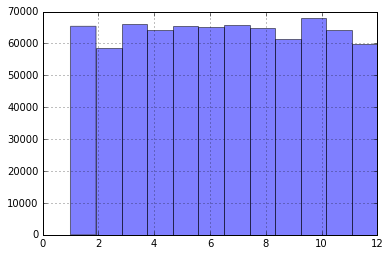

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
month=data['Month of diagnosis']
month.hist(alpha=0.5, bins=12)
"""
play with Kernels
see 
"""
print("average age at diagnosis",data['Age at diagnosis'].mean())

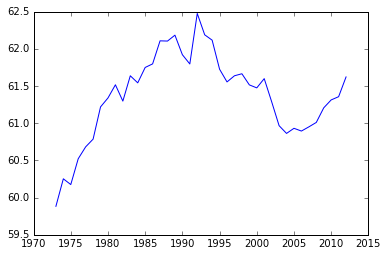

In [17]:
series= [ [year, data['Age at diagnosis'][data['Year of diagnosis'] == year].mean()] for year in range(1973, 2013)]
series=np.array(series)

plt.figure()
plt.plot(series[:,0], series[:,1])

In [23]:
validFields= []
for field in data.keys():
    try:
        Not_A_Number_Total=np.isnan(data[field]).sum()
        if Not_A_Number_Total>0:
            print(field, Not_A_Number_Total)
        else:
            validFields.append(field)
    except TypeError:
        print(field, "is not a numeric field check differently")
        validFields.append(field)

print(len(validFields), "fully documented fields:\n", validFields)

Year of Birth 40
Primary Site is not a numeric field check differently


EOD-Tumor Size 437074
EOD-Extension 437074
EOD-Extension Prost Path 769261
EOD-Lymph Node Involv 437074
Regional Nodes Positive 174651
Regional Nodes Examined 174651
EOD-Old 13 Digit is not a numeric field check differently
EOD-Old 2 Digit is not a numeric field check differently
EOD-Old 4 Digit 696677
Coding System for EOD 262423


Tumor Marker 1 262423
Tumor Marker 2 262423
Tumor Marker 3 262423
CS Tumor Size 506838
CS Extension 506838
CS Lymph Nodes 506838
CS Mets at Dx 506838
CS Site-Specific Factor 1 506838


CS Site-Specific Factor 2 506838
CS Site-Specific Factor 3 506838
CS Site-Specific Factor 4 506838
CS Site-Specific Factor 5 506838
CS Site-Specific Factor 6 506838
CS Site-Specific Factor 25 506838
Derived AJCC T 506838


Derived AJCC N 506838
Derived AJCC M 506838
Derived AJCC Stage Group 506838
Derived SS1977 506838
Derived SS2000 506838
Derived AJCC-Flag 506838
CS Version Input Original 506838


CS Version Derived 506838
CS Version Input Current 506838
RX Summ-Surg Prim Site 363635
RX Summ-Scope Reg LN Sur 483489
RX Summ-Surg Oth Reg/Dis 483489
RX Summ-Reg LN Examined 649407


RX Summ-Surgery Type 405626
RX Summ-Scope Reg 98-02 649407
RX Summ-Surg Oth 98-02 649407
Recode ICD-O-2 to 10 is not a numeric field check differently


AJCC stage 3rd edition (1988-2003) 437074
SEER modified AJCC Stage 3rd ed (1988-2003) 437074
SEER Summary Stage 1977 (1995-2000) 635301
SEER Summary Stage 2000 (2001-2003) 697066


IHS Link 106895
Summary stage 2000 (1998+) 363635
CS Tumor Size/Ext Eval 531970
CS Lymph Nodes Eval 531968


CS Mets Eval 531985
CS Site-Specific Factor 8 769261
CS Site-Specific Factor 10 769261
CS Site-Specific Factor 11 769261


CS Site-Specific Factor 13 769261
CS Site-Specific Factor 15 658461
CS Site-Specific Factor 16 769261
Lymph vascular invasion 769261
Insurance recode (2007+) 579416
Derived AJCC-7 T 658461


Derived AJCC-7 N 658461
Derived AJCC-7 M 658461
Derived AJCC-7 Stage Grp 658461
Breast Adjusted AJCC 6th T (1988+) 174651
Breast Adjusted AJCC 6th N (1988+) 174651
Breast Adjusted AJCC 6th M (1988+) 174651
Breast Adjusted AJCC 6th Stage (1988+) 174651
CS Site-Specific Factor 7 658461


CS Site-Specific Factor 9 769261
CS Site-Specific Factor 12 769261
CS Mets at Dx-Bone 658461
CS Mets at Dx-Brain 658461
CS Mets at Dx-Liver 658461


CS Mets at Dx-Lung 658461
T value - based on AJCC 3rd (1988-2003) 437074
N value - based on AJCC 3rd (1988-2003) 437074
M value - based on AJCC 3rd (1988-2003) 437074
59 fully documented fields:
 ['Patient ID number', 'Registry ID', 'Marital Status at DX', 'Race/Ethnicity', 'NHIA Derived Hispanic Origin', 'Sex', 'Age at diagnosis', 'Sequence Number-Central', 'Month of diagnosis', 'Year of diagnosis', 'Primary Site', 'Laterality', 'Histology (92-00) ICD-O-2', 'Behavior (92-00) ICD-O-2', 'Histologic Type ICD-O-3', 'Behavior Code ICD-O-3', 'Grade', 'Diagnostic Confirmation', 'Type of Reporting Source', 'EOD-Old 13 Digit', 'EOD-Old 2 Digit', 'Reason for no surgery', 'RX Summ-Radiation', 'RX Summ-Rad to CNS', 'RX Summ-Surg / Rad Seq', 'SEER Record Number', 'SEER Type of Follow-up', 'Age Recode <1 Year olds', 'Site Recode ICD-O-3/WHO 2008', 'Recode ICD-O-2 to 9', 'Recode ICD-O-2 to 10', 'ICCC site recode ICD-O-3/WHO 2008', 'ICCC site rec extended ICD-O-3/WHO 2008', 'Behavior Recode for Analy

In [ ]:
"""
2016-12-06

Directions to explore:

Data cleanup: Many fields are not complete for various reasons, do we try to complete them ? remove incomplete records ? split into sub datasets
 
exploratory datasets : 10k lines long snapshots of the files 

relapse ? patients listed several times in a file ? across files ??





"""